In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def score (psnr, runtime, psnr_interp=31.697655):
    '''
    Scoring formula for Real-time SR.
    - psnr_interp: PSNR for Bicubic interpolation in the val/test set.
    
    The funtion nullifies methods that perform worst than Bicubic.
    If the runtime is <16ms, growth is faster.
    Methods like RFDN (135.99ms) or IMDN (170.10ms) are not competitive.
    
    More info at: https://github.com/eduardzamfir/NTIRE23-RTSR#performance-of-baseline-methods
    Metric inspired by: https://arxiv.org/pdf/2211.05910.pdf
    '''
    
    diff = max(psnr-psnr_interp, 0)
    if diff == 0:
        return 0
    else:
        cte  = 0.1
        return ((2**diff*2)) / (cte*((runtime**0.5)))

In [3]:
runtimes        = list(np.arange(1,42,0.1))
scores_base     = [score(31.697655, t)  for t in runtimes]
scores_base_1   = [score(32.70, t)  for t in runtimes]
scores_base_1_5 = [score(33.20, t)  for t in runtimes]

Text(0.5, 1.0, 'Score x Runtime (1 to 42ms)')

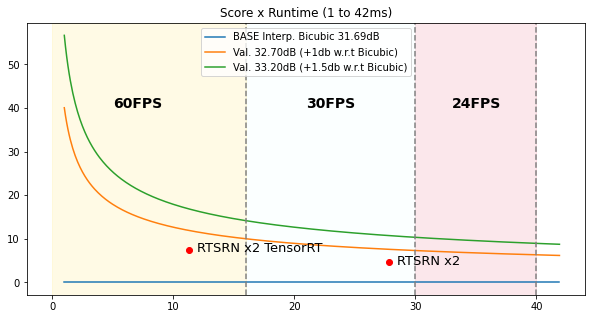

In [4]:
plt.figure(figsize=(10,5))

plt.plot(runtimes, scores_base,     label='BASE Interp. Bicubic 31.69dB')
plt.plot(runtimes, scores_base_1,   label='Val. 32.70dB (+1db w.r.t Bicubic)')
plt.plot(runtimes, scores_base_1_5, label='Val. 33.20dB (+1.5db w.r.t Bicubic)')

plt.axvline(16, color='gray', linestyle="--")
plt.axvline(30, color='gray', linestyle="--")
plt.axvline(40, color='gray', linestyle="--")
plt.text(5,  40, '60FPS',  fontweight='bold', fontsize=14)
plt.text(21, 40, '30FPS', fontweight='bold', fontsize=14)
plt.text(33, 40, '24FPS', fontweight='bold', fontsize=14)
plt.axvspan(30, 40, color="crimson", alpha=0.1)
plt.axvspan(16, 30, color="lightcyan", alpha=0.1)
plt.axvspan(0,  16, color="gold", alpha=0.1)

plt.plot(27.86, score(32, 27.86),'ro'); plt.text(28.5, 4, 'RTSRN x2', fontsize=13)
plt.plot(11.26, score(32, 11.26),'ro'); plt.text(12, 7, 'RTSRN x2 TensorRT', fontsize=13)

plt.legend()
plt.title('Score x Runtime (1 to 42ms)')

In [5]:
# Baseline: https://github.com/eduardzamfir/NTIRE23-RTSR#performance-of-baseline-methods
score(32, 27.86)

4.672554263632112

In [6]:
# Improving 0.1dB or reducing 1ms have approx the same impact
score(32, 10), score(32.1, 10), score(32, 9)

(7.799107556867665, 8.358876510917035, 8.220981198777668)

In [7]:
# PSNR improvements under 16ms
score(32, 15), score(32.1, 15), score(32.15, 15)

(6.3679446544700395, 6.824994091560841, 7.065676988417572)

In [8]:
# RFDN and IMDN
score(32.5, 135.99), score(32.5, 170.10)

(2.990931182912891, 2.6742853838652163)